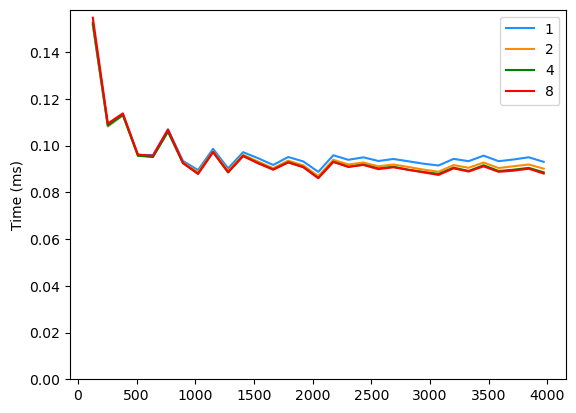

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colors = ["dodgerblue", "darkorange", "green", "red"]

# Prefill
data = pd.read_csv("prefill.csv")
bszs = sorted(list(set(data['bsz'])))

for k, bsz in enumerate(bszs):
  tdata = data[data['bsz'] == bsz]
  ntoks = np.array(tdata['ntok'])
  plt.plot(tdata['ntok'], tdata['time'] * 1000 / ntoks, color=colors[k], label=str(bsz))
  
plt.ylim(0)
plt.ylabel("Time (ms)")
plt.legend()
plt.show()


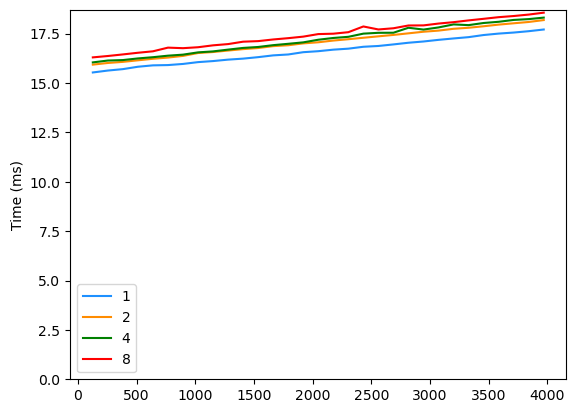

In [24]:
# Decode
data = pd.read_csv("decode.csv")
bszs = sorted(list(set(data['bsz'])))

for k, bsz in enumerate(bszs):
  tdata = data[data['bsz'] == bsz]
  if k == 0:
    base_time = tdata['time'][0]
  plt.plot(tdata['ntok'], tdata['time'] * 1000, color=colors[k], label=str(bsz))

plt.ylim(0)
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

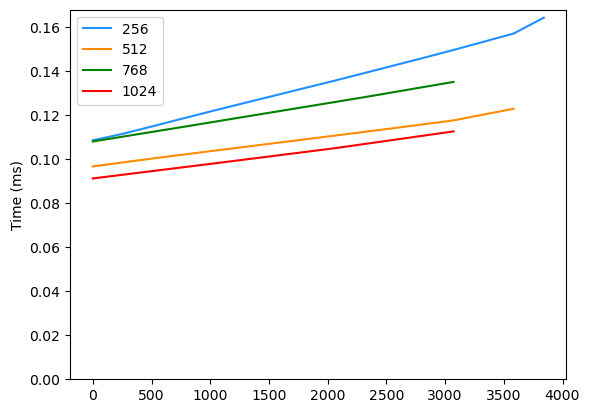

In [26]:
# Chunked prefill
data = pd.read_csv("chunk.csv")

chnks = sorted(list(set(data['chunk'])))

for k, chnk in enumerate(chnks[1::2]):
  tdata = data[data['chunk'] == chnk]
  plt.plot(tdata['prefix'], tdata['time'] * 1000 / chnk, color=colors[k % len(colors)], label=str(chnk))
  
plt.ylim(0)
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

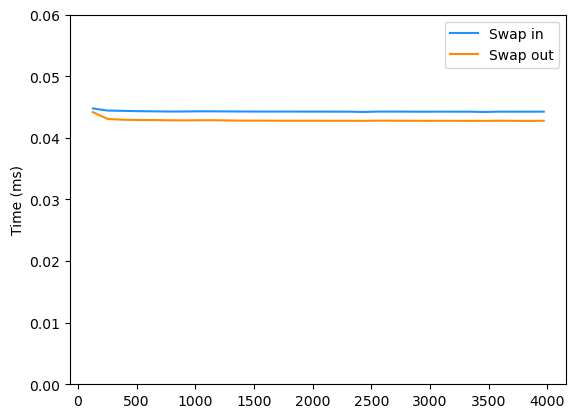

In [27]:
data = pd.read_csv("swap.csv")

ntoks = data['ntok']
si_times = data['swap_in']
so_times = data['swap_out']

plt.plot(ntoks, si_times * 1000 / ntoks, color=colors[0], label="Swap in")
plt.plot(ntoks, so_times * 1000 / ntoks, color=colors[1], label="Swap out")

plt.ylim(0, 0.06)
plt.ylabel("Time (ms)")
plt.legend()
plt.show()